VISUALIZACION

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('ny_1.csv')
df

,Unnamed: 0,title,guest_favorite,rating,number_reviews,type_host,hosting_time,price,all_reviews,complete_data_list,url
0,0,"Romantic Artist Townhouse, 2 Bd Suite, 1 Bth",True,Rated 4.99 out of 5 stars.\r\n4.99,197,2 bedrooms,2 bedrooms · 3 beds · Dedicated bathroom,€ 176,['Rare upper west side location in a classic N...,['2 bedrooms · 3 beds · Dedicated bathroom'],https://www.airbnb.com/rooms/18342361?adults=1...
1,1,"Bright, Cozy room in Brooklyn",False,4.86,search\r\nLocation\r\nAnywhere\r\nCheck,1 queen bed,1 queen bed · Shared bathroom,€ 447,"[""We felt right at home at Edgars place and ha...",['1 queen bed · Shared bathroom'],https://www.airbnb.com/rooms/7837816?adults=1&...
2,2,Lux Penthouse in Hudson Yards,True,Rated 5.0 out of 5 stars.\r\n5.0,18,4 guests,4 guests · 2 bedrooms · 2 beds · 2 baths,€ 193,['This place is truly amazing in New York city...,['4 guests · 2 bedrooms · 2 beds · 2 baths'],https://www.airbnb.com/rooms/11558121710846896...
3,3,East Village Private Studio for One Guest,True,Rated 4.94 out of 5 stars.\r\n4.94,449,1 guest,1 guest · 1 bedroom · 1 bed · 1 bath,€ 221,"[""I felt part of the beautiful community and w...",['1 guest · 1 bedroom · 1 bed · 1 bath'],https://www.airbnb.com/rooms/1766846?adults=1&...
4,4,Family Friendly Greenpoint Abode w/chef kitchen,True,Rated 4.94 out of 5 stars.\r\n4.94,368,2 bedrooms,2 bedrooms · 2 beds · Dedicated bathroom,€ 230,"[""We enjoyed our stay at Leslie's place and wo...",['2 bedrooms · 2 beds · Dedicated bathroom'],https://www.airbnb.com/rooms/17270768?adults=1...
...,...,...,...,...,...,...,...,...,...,...,...
66,66,NaN,False,5.0,search\r\nLocation\r\nAnywhere\r\nCheck,6 guests,6 guests · 3 bedrooms · 4 beds · 2 baths,€ 137,['Luis was awesome. Amazing place. Thanks for ...,['6 guests · 3 bedrooms · 4 beds · 2 baths'],https://www.airbnb.com/rooms/92318417693885569...
67,67,NaN,False,NaN,home,NaN,New host,€ 241,[],NaN,https://www.airbnb.com/rooms/50154380?adults=1...
68,68,NaN,False,NaN,NaN,NaN,New host,€ 200,[],NaN,https://www.airbnb.com/rooms/96599599203467298...
69,69,Downtown Stay | Sightseeing. Free Breakfast,True,Rated 4.92 out of 5 stars.\r\n4.92,13,2 guests,2 guests · Studio · 1 bed · 1 bath,€ 183,"['excellent service, very good breakfast, all ...",['2 guests · Studio · 1 bed · 1 bath'],https://www.airbnb.com/rooms/11251390980787863...


In [2]:
df['rating'].str.extract(r'(\d\.\d{1,2})$').astype(float)

,0
0,4.99
1,4.86
2,5.00
3,4.94
4,4.94
...,...
66,5.00
67,NaN
68,NaN
69,4.92


In [3]:
import pandas as pd
import re

def limpiezadedatos(df):
    # Limpiar la columna rating: extraer los últimos 4 dígitos y convertir a float
    df['rating'] = df['rating'].str.extract(r'(\d\.\d{1,2})$').astype(float)

    # Convertir number_reviews a float
    df['number_reviews'] = pd.to_numeric(df['number_reviews'], errors='coerce')

    # Limpiar la columna price: eliminar símbolos y convertir a float
    df['price'] = df['price'].replace({'[€,$]': '', ',': ''}, regex=True).astype(float)

    # Guardar el dataframe limpio en un nuevo CSV
    df.to_csv('proyectoairbnblimpio.csv', index=False)

    return df


df_limpio = limpiezadedatos(df)


In [4]:
df  

,Unnamed: 0,title,guest_favorite,rating,number_reviews,type_host,hosting_time,price,all_reviews,complete_data_list,url
0,0,"Romantic Artist Townhouse, 2 Bd Suite, 1 Bth",True,4.99,197.0,2 bedrooms,2 bedrooms · 3 beds · Dedicated bathroom,176.0,['Rare upper west side location in a classic N...,['2 bedrooms · 3 beds · Dedicated bathroom'],https://www.airbnb.com/rooms/18342361?adults=1...
1,1,"Bright, Cozy room in Brooklyn",False,4.86,NaN,1 queen bed,1 queen bed · Shared bathroom,447.0,"[""We felt right at home at Edgars place and ha...",['1 queen bed · Shared bathroom'],https://www.airbnb.com/rooms/7837816?adults=1&...
2,2,Lux Penthouse in Hudson Yards,True,5.00,18.0,4 guests,4 guests · 2 bedrooms · 2 beds · 2 baths,193.0,['This place is truly amazing in New York city...,['4 guests · 2 bedrooms · 2 beds · 2 baths'],https://www.airbnb.com/rooms/11558121710846896...
3,3,East Village Private Studio for One Guest,True,4.94,449.0,1 guest,1 guest · 1 bedroom · 1 bed · 1 bath,221.0,"[""I felt part of the beautiful community and w...",['1 guest · 1 bedroom · 1 bed · 1 bath'],https://www.airbnb.com/rooms/1766846?adults=1&...
4,4,Family Friendly Greenpoint Abode w/chef kitchen,True,4.94,368.0,2 bedrooms,2 bedrooms · 2 beds · Dedicated bathroom,230.0,"[""We enjoyed our stay at Leslie's place and wo...",['2 bedrooms · 2 beds · Dedicated bathroom'],https://www.airbnb.com/rooms/17270768?adults=1...
...,...,...,...,...,...,...,...,...,...,...,...
66,66,NaN,False,5.00,NaN,6 guests,6 guests · 3 bedrooms · 4 beds · 2 baths,137.0,['Luis was awesome. Amazing place. Thanks for ...,['6 guests · 3 bedrooms · 4 beds · 2 baths'],https://www.airbnb.com/rooms/92318417693885569...
67,67,NaN,False,NaN,NaN,NaN,New host,241.0,[],NaN,https://www.airbnb.com/rooms/50154380?adults=1...
68,68,NaN,False,NaN,NaN,NaN,New host,200.0,[],NaN,https://www.airbnb.com/rooms/96599599203467298...
69,69,Downtown Stay | Sightseeing. Free Breakfast,True,4.92,13.0,2 guests,2 guests · Studio · 1 bed · 1 bath,183.0,"['excellent service, very good breakfast, all ...",['2 guests · Studio · 1 bed · 1 bath'],https://www.airbnb.com/rooms/11251390980787863...


In [5]:
#df['rating_cleaned'].isna().sum()
#df['number_reviews_cleaned'].isna().sum()
#df['price_cleaned'].isna().sum()

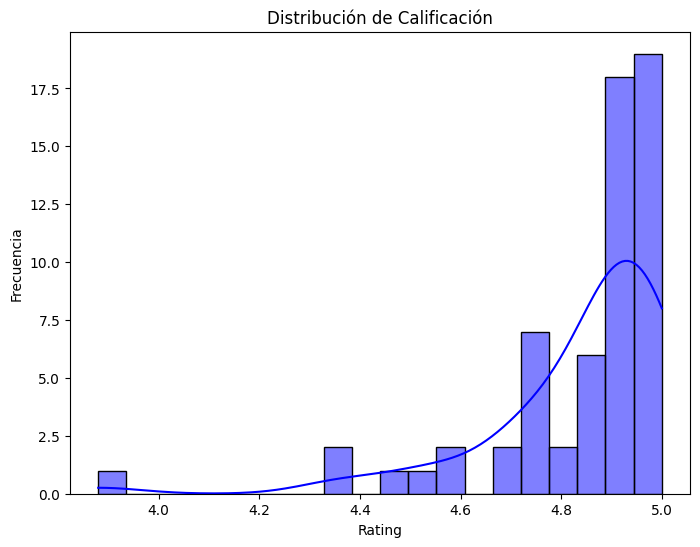

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], kde=True, bins=20, color='blue')
plt.title('Distribución de Calificación')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

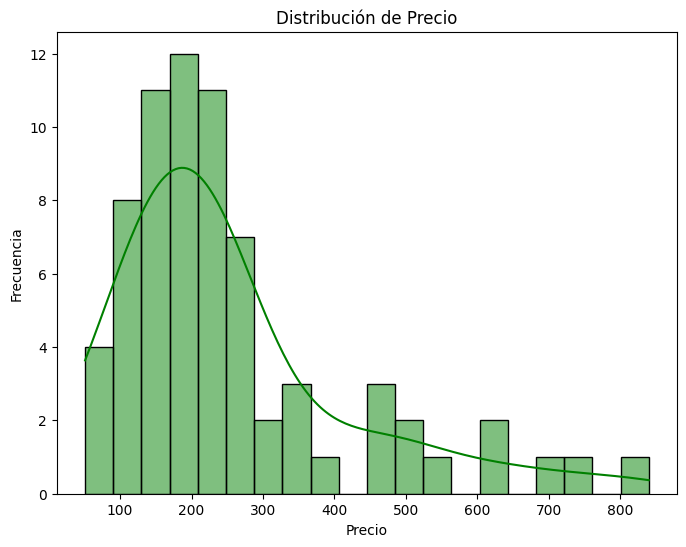

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=20, color='green')
plt.title('Distribución de Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

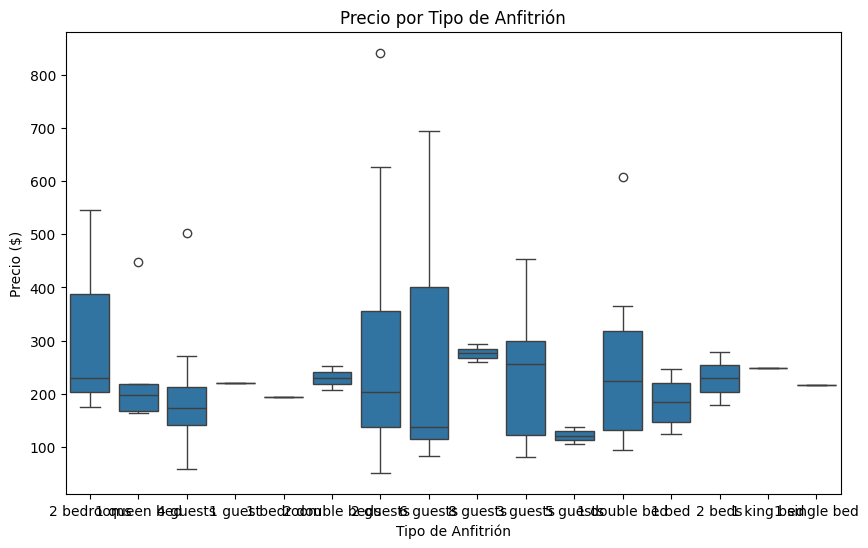

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_host', y='price', data=df)
plt.title('Precio por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Precio ($)')
plt.show()

C:\Users\stehu\AppData\Local\Temp\ipykernel_9972\1472098418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type_host', y='rating', data=df, palette="muted")


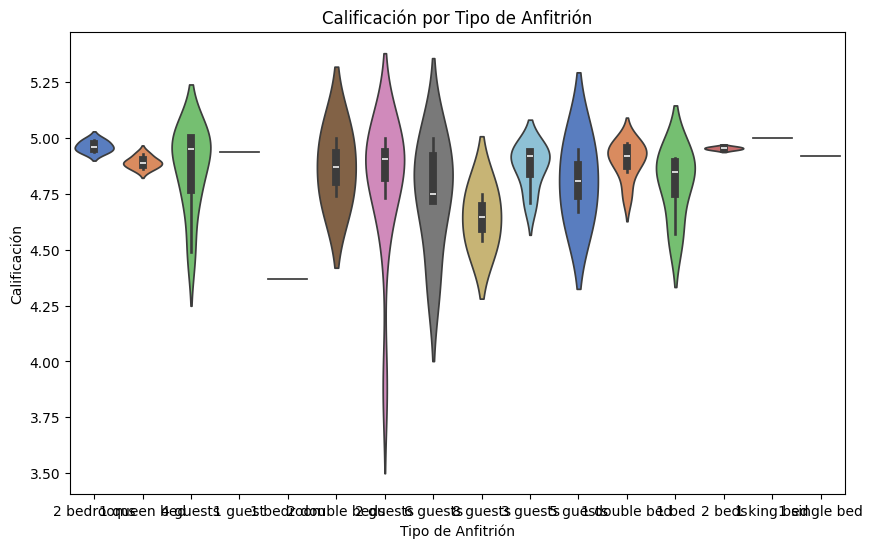

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='type_host', y='rating', data=df, palette="muted")
plt.title('Calificación por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Calificación')
plt.show()

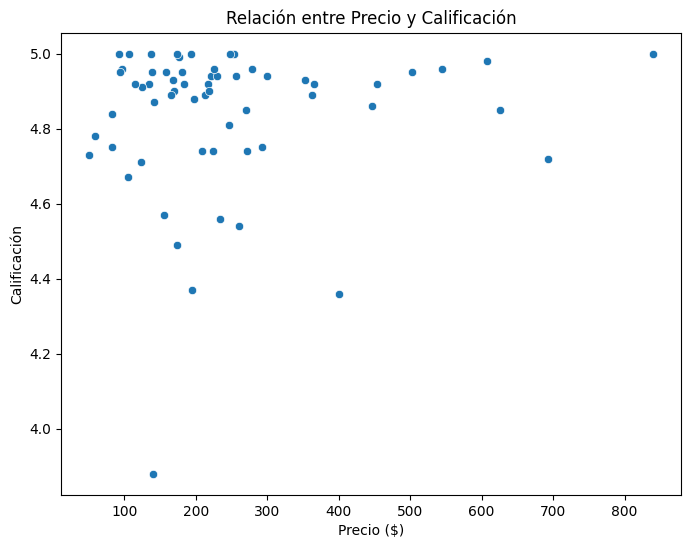

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='rating', data=df)
plt.title('Relación entre Precio y Calificación')
plt.xlabel('Precio ($)')
plt.ylabel('Calificación')
plt.show()


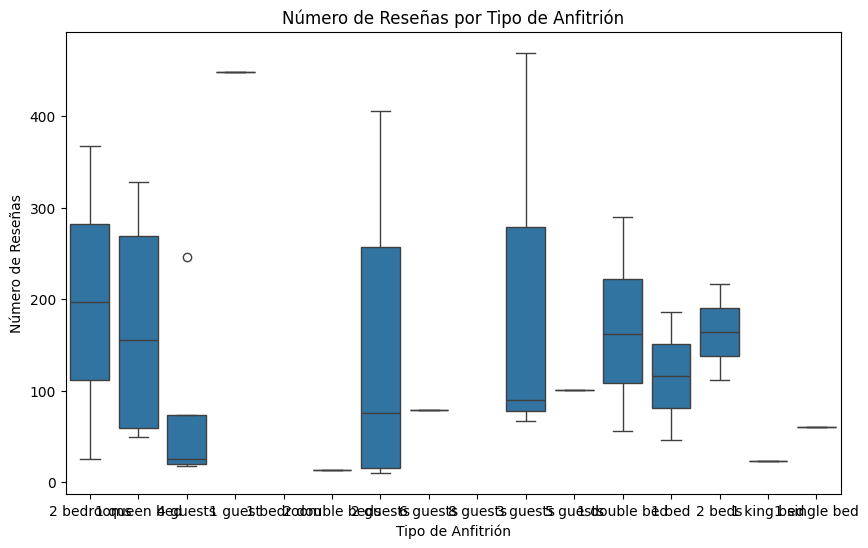

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type_host', y='number_reviews', data=df)
plt.title('Número de Reseñas por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Número de Reseñas')
plt.show()


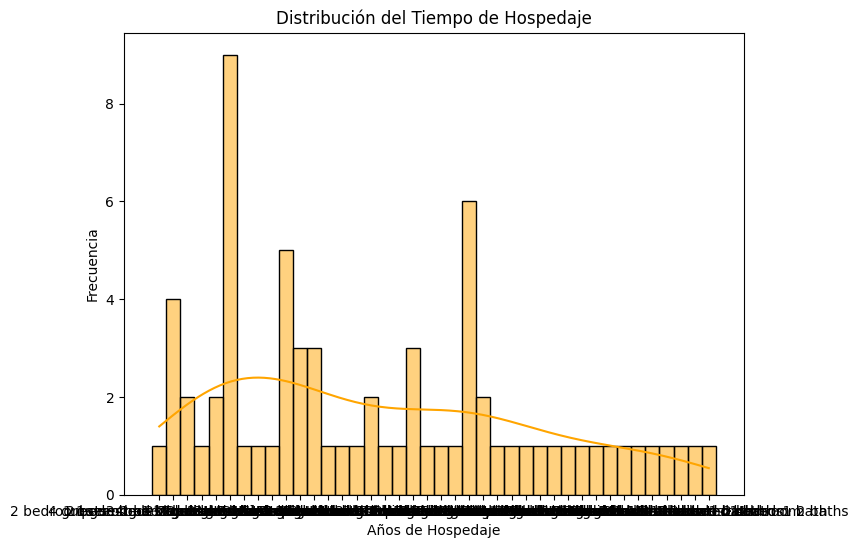

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['hosting_time'], kde=True, bins=20, color='orange')
plt.title('Distribución del Tiempo de Hospedaje')
plt.xlabel('Años de Hospedaje')
plt.ylabel('Frecuencia')
plt.show()


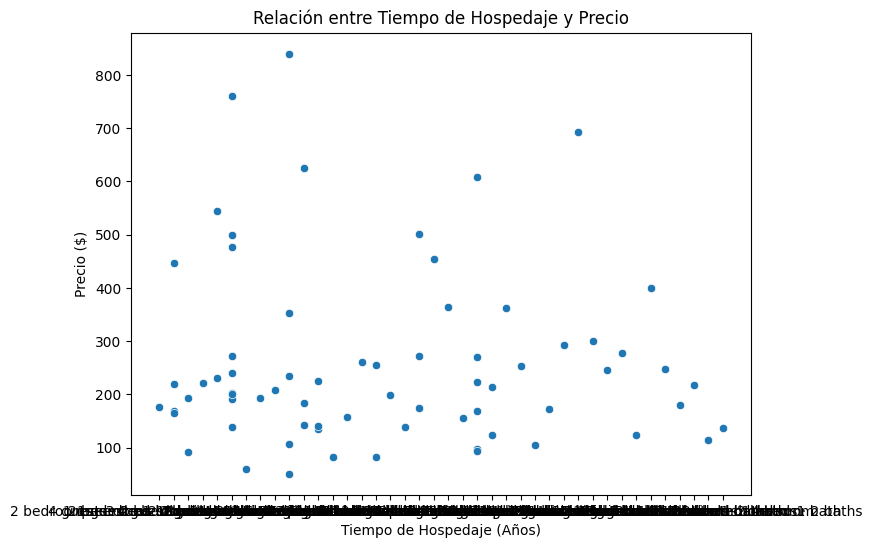

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hosting_time', y='price', data=df)
plt.title('Relación entre Tiempo de Hospedaje y Precio')
plt.xlabel('Tiempo de Hospedaje (Años)')
plt.ylabel('Precio ($)')
plt.show()


C:\Users\stehu\AppData\Local\Temp\ipykernel_9972\1472098418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type_host', y='rating', data=df, palette="muted")


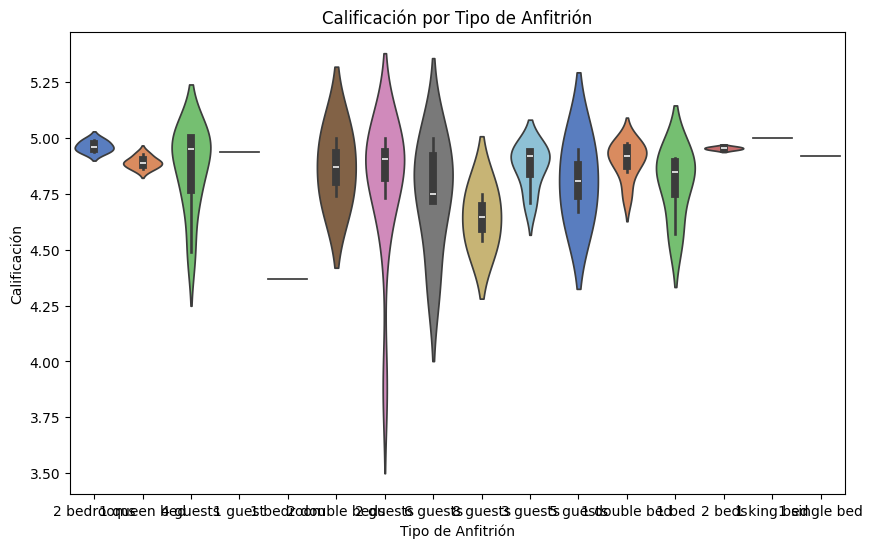

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='type_host', y='rating', data=df, palette="muted")
plt.title('Calificación por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Calificación')
plt.show()

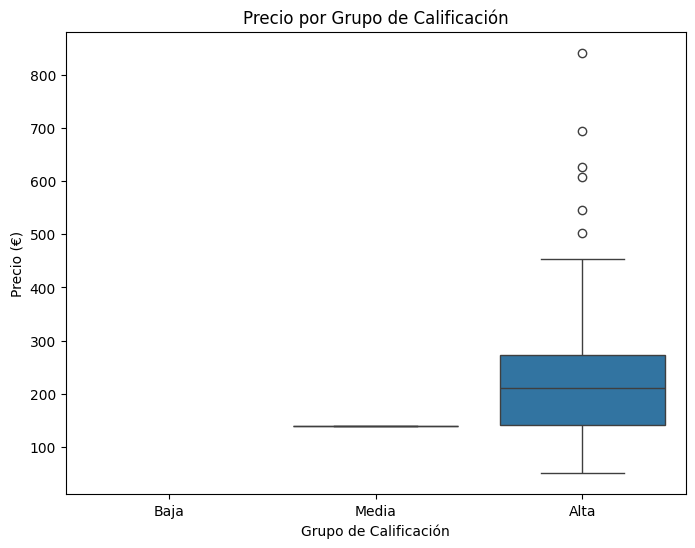

In [15]:
# Paso 1: Eliminar filas donde el valor de 'rating' es "reviews" o es NaN
df_cleaned = df[df['rating'] != 'reviews']  # Eliminar 'reviews'
df_cleaned['rating'] = pd.to_numeric(df_cleaned['rating'], errors='coerce')  # Convertir a numérico
df_cleaned = df_cleaned.dropna(subset=['rating', 'price'])  # Eliminar NaN

# Paso 2: Crear grupos de calificación
df_cleaned['rating_group'] = pd.cut(df_cleaned['rating'], bins=[0, 3, 4, 5], labels=['Baja', 'Media', 'Alta'])

# Paso 3: Graficar el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating_group', y='price', data=df_cleaned)
plt.title('Precio por Grupo de Calificación')
plt.xlabel('Grupo de Calificación')
plt.ylabel('Precio (€)')
plt.show()



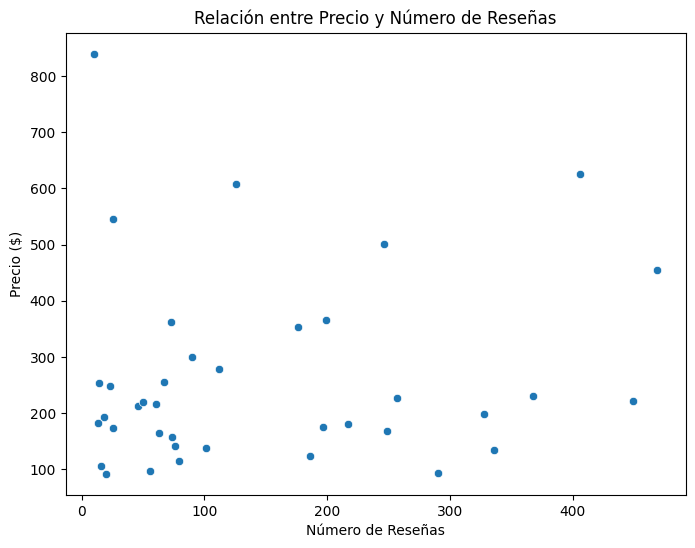

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='number_reviews', y='price', data=df)
plt.title('Relación entre Precio y Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio ($)')
plt.show()


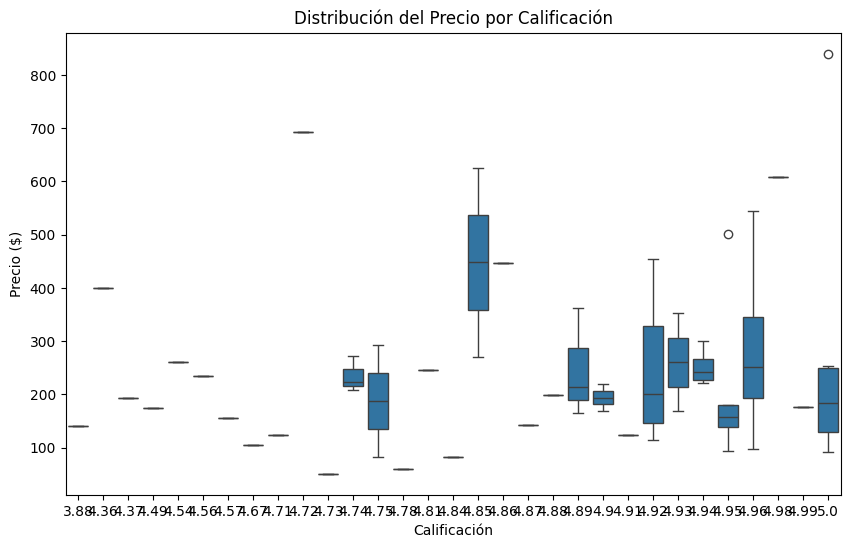

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='price', data=df)
plt.title('Distribución del Precio por Calificación')
plt.xlabel('Calificación')
plt.ylabel('Precio ($)')
plt.show()


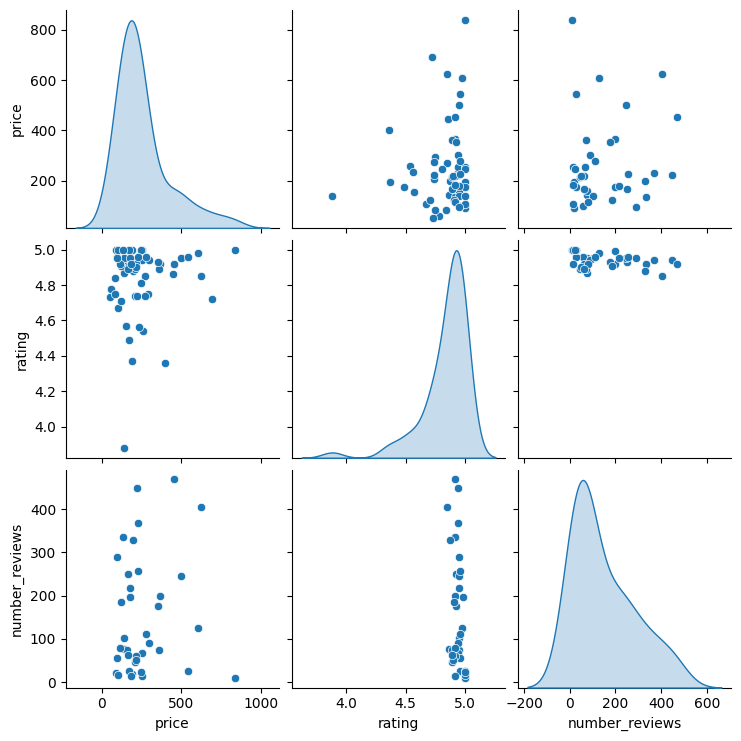

In [18]:
sns.pairplot(df[['price', 'rating', 'number_reviews', 'hosting_time']], diag_kind='kde')
plt.show()


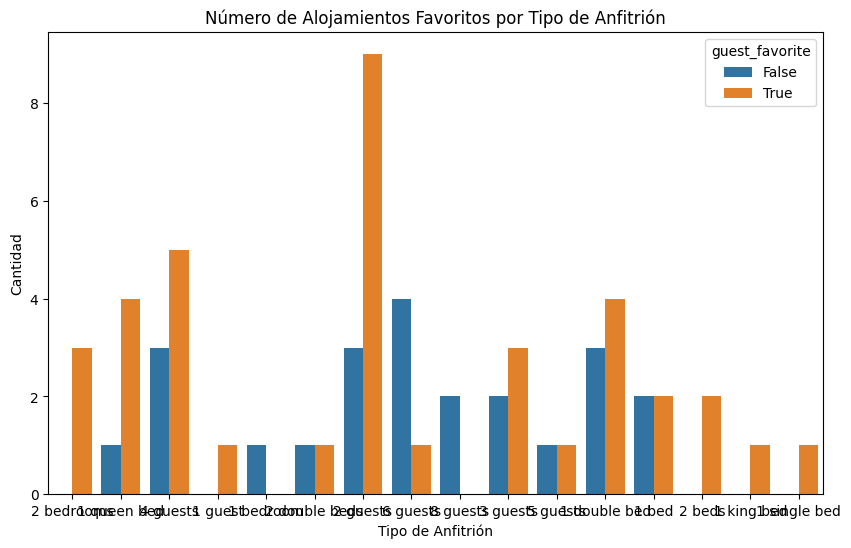

In [19]:


plt.figure(figsize=(10, 6))
sns.countplot(x='type_host', hue='guest_favorite', data=df)
plt.title('Número de Alojamientos Favoritos por Tipo de Anfitrión')
plt.xlabel('Tipo de Anfitrión')
plt.ylabel('Cantidad')
plt.show()


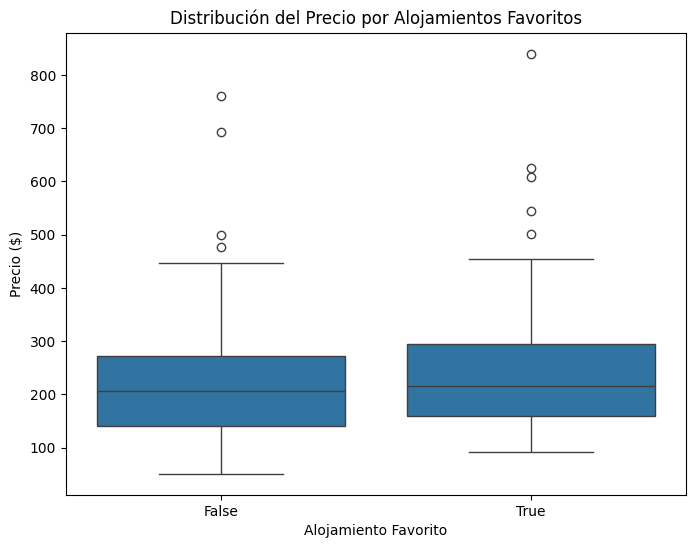

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='guest_favorite', y='price', data=df)
plt.title('Distribución del Precio por Alojamientos Favoritos')
plt.xlabel('Alojamiento Favorito')
plt.ylabel('Precio ($)')
plt.show()


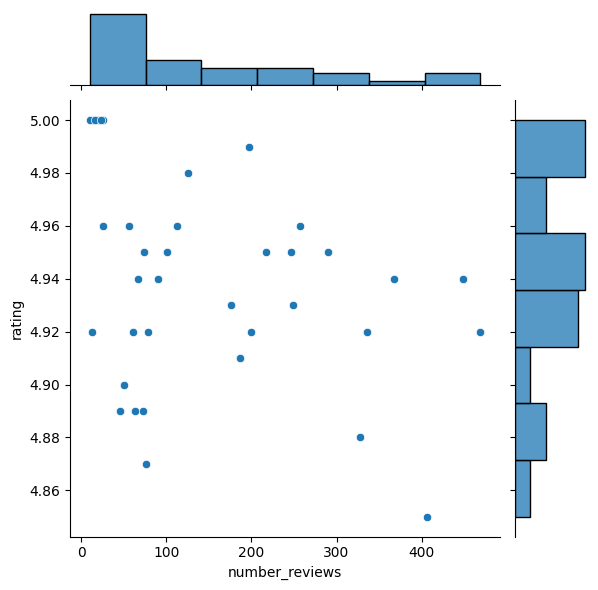

In [21]:
# Filtrar las filas donde 'rating' y 'number_reviews' no contengan 'reviews'
df_cleaned = df[(df['rating'] != 'reviews') & (df['number_reviews'] != 'reviews')].copy()

# Convertir las columnas 'rating' y 'number_reviews' a numérico
df_cleaned['rating'] = pd.to_numeric(df_cleaned['rating'], errors='coerce')
df_cleaned['number_reviews'] = pd.to_numeric(df_cleaned['number_reviews'], errors='coerce')

# Eliminar filas con NaN en 'rating' o 'number_reviews'
df_cleaned = df_cleaned.dropna(subset=['rating', 'number_reviews'])

# Generar el gráfico conjunto (jointplot)
sns.jointplot(x='number_reviews', y='rating', data=df_cleaned, kind='scatter')

# Mostrar el gráfico
plt.show()


In [22]:

# import re

# # Función para convertir hosting_time a meses
# def con_a_meses(hosting_time):
#     # Buscar "years" y convertir a meses
#     years_match = re.search(r'(\d+)\s+years', hosting_time)
#     if years_match:
#         years = int(years_match.group(1))
#         return years * 12
    
#     years_match = re.search(r'(\d+)\s+year', hosting_time)
#     if years_match:
#         years = int(years_match.group(1))
#         return years * 12
    
#     # Buscar "months" y dejar en meses
#     months_match = re.search(r'(\d+)\s+months', hosting_time)
#     if months_match:
#         months = int(months_match.group(1))
#         return months
    
#     # Buscar "days" y convertir a meses (aprox. 30 días = 1 mes)
#     days_match = re.search(r'(\d+)\s+days', hosting_time)
#     if days_match:
#         days = int(days_match.group(1))
#         return days / 30  # Convertir días a meses
    
#     return 0  # Si no hay coincidencia, devolver 0 meses

# # Aplicar la función a la columna 'hosting_time'
# df['hosting_time_cleaned'] = df['hosting_time'].apply(con_a_meses)

# # Visualizar los primeros valores
# print(df[['hosting_time', 'hosting_time_cleaned']].head())



In [23]:
# plt.figure(figsize=(10, 20))
# sns.boxplot(x='type_host', y=df['hosting_time'].apply(convert_to_months), data=df)
# plt.title('Tiempo de Hospedaje por Tipo de Anfitrión')
# plt.xlabel('Tipo de Anfitrión')
# plt.ylabel('Años de Hospedaje')
# plt.show()


In [24]:
# Verificar si las columnas numéricas contienen valores no numéricos
for col in numeric_cols:
    non_numeric = df[~df[col].apply(lambda x: isinstance(x, (int, float)))]
    if len(non_numeric) > 0:
        print(f"Valores no numéricos encontrados en la columna {col}:")
        print(non_numeric.head())

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con NaN en las columnas numéricas
df = df.dropna(subset=numeric_cols)
df
# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()


NameError: name 'numeric_cols' is not defined

In [33]:
# Seleccionar las columnas numéricas para el análisis de correlación
numeric_cols = ['rating', 'number_reviews', 'hosting_time', 'price']

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Título del mapa de calor
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')

# Mostrar el gráfico
plt.show()


ValueError: could not convert string to float: '2 bedrooms · 3 beds · Dedicated bathroom'

In [30]:
df_cleaned = df.dropna()

# Convertir 'guest_favorite' a valores numéricos (True = 1, False = 0)
df_cleaned['guest_favorite'] = df_cleaned['guest_favorite'].astype(int)

# Calcular la matriz de correlación
correlation_matrix = df_cleaned.corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title('Mapa de Calor de Correlaciones (sin NaN)')
plt.show()

C:\Users\stehu\AppData\Local\Temp\ipykernel_9972\3990951091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['guest_favorite'] = df_cleaned['guest_favorite'].astype(int)


ValueError: could not convert string to float: 'Romantic Artist Townhouse, 2 Bd Suite, 1 Bth'

In [29]:
# Rellenar los NaN con la media de cada columna
df_filled = df.fillna(df.mean())

# Convertir 'guest_favorite' a valores numéricos (True = 1, False = 0)
df_filled['guest_favorite'] = df_filled['guest_favorite'].astype(int)

# Calcular la matriz de correlación
correlation_matrix = df_filled.corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title('Mapa de Calor de Correlaciones (rellenado NaN)')
plt.show()

TypeError: can only concatenate str (not "int") to str

In [32]:
# Convertir 'guest_favorite' a valores numéricos (True = 1, False = 0)
df_filled = df.fillna(df.mean())
df_filled['guest_favorite'] = df['guest_favorite'].astype(int)

# Calcular la matriz de correlación
correlation_matrix = df_filled.corr()

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title('Mapa de Calor de Correlaciones')
plt.show()

TypeError: can only concatenate str (not "int") to str